In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from weather_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [73]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

In [76]:
print("""Beginning Data Retrieval
         ---------------------------""")
curr_record = 1
curr_set = 1
city_data_json = []
for city in cities:
    print(f"Processing Record {curr_record} of Set {curr_set} | {city}")
    res = requests.get(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial')
    if res.status_code == 200:
        city_data_json.append(res.json())
    else:
        print("City not found. Skipping...")
    curr_record += 1
    if curr_record % 50 == 0:
        curr_set += 1
        curr_record = 1
        time.sleep(20) #api is slow so this seems to cover any needed delay

Beginning Data Retrieval
         ---------------------------
Processing Record 1 of Set 1 | paradwip
City not found. Skipping...
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | devils lake
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | sompeta
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | xai-xai
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | livingston
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | quelimane
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | zhukovo
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | dargaville
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | b

Processing Record 41 of Set 4 | namanyere
Processing Record 42 of Set 4 | saint-joseph
Processing Record 43 of Set 4 | poltavka
Processing Record 44 of Set 4 | tilichiki
Processing Record 45 of Set 4 | shushenskoye
Processing Record 46 of Set 4 | aykhal
Processing Record 47 of Set 4 | dikson
Processing Record 48 of Set 4 | lolua
City not found. Skipping...
Processing Record 49 of Set 4 | mahanoro
Processing Record 1 of Set 5 | chulym
Processing Record 2 of Set 5 | nesbyen
Processing Record 3 of Set 5 | paraopeba
Processing Record 4 of Set 5 | borujan
City not found. Skipping...
Processing Record 5 of Set 5 | baykit
Processing Record 6 of Set 5 | orgun
City not found. Skipping...
Processing Record 7 of Set 5 | bethel
Processing Record 8 of Set 5 | ketchikan
Processing Record 9 of Set 5 | santa isabel do rio negro
Processing Record 10 of Set 5 | karratha
Processing Record 11 of Set 5 | los llanos de aridane
Processing Record 12 of Set 5 | lisakovsk
Processing Record 13 of Set 5 | attawap

Processing Record 36 of Set 8 | cururupu
Processing Record 37 of Set 8 | umm kaddadah
Processing Record 38 of Set 8 | flinders
Processing Record 39 of Set 8 | bonthe
Processing Record 40 of Set 8 | oni
Processing Record 41 of Set 8 | lasa
Processing Record 42 of Set 8 | nome
Processing Record 43 of Set 8 | robertson
Processing Record 44 of Set 8 | hamilton
Processing Record 45 of Set 8 | araouane
Processing Record 46 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 47 of Set 8 | waingapu
Processing Record 48 of Set 8 | ilebo
Processing Record 49 of Set 8 | labuhan
Processing Record 1 of Set 9 | okha
Processing Record 2 of Set 9 | kegalla
City not found. Skipping...
Processing Record 3 of Set 9 | salalah
Processing Record 4 of Set 9 | solnechnyy
Processing Record 5 of Set 9 | mecca
Processing Record 6 of Set 9 | ulladulla
Processing Record 7 of Set 9 | mazara del vallo
Processing Record 8 of Set 9 | thinadhoo
Processing Record 9 of Set 9 | khandyga
Processing Recor

Processing Record 24 of Set 12 | kaspiysk
Processing Record 25 of Set 12 | nova lima
Processing Record 26 of Set 12 | tefe
Processing Record 27 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 28 of Set 12 | tongliao
Processing Record 29 of Set 12 | avare
Processing Record 30 of Set 12 | odawara
Processing Record 31 of Set 12 | kaharlyk
Processing Record 32 of Set 12 | san quintin
Processing Record 33 of Set 12 | cerqueira cesar
Processing Record 34 of Set 12 | tamale
Processing Record 35 of Set 12 | chagda
City not found. Skipping...
Processing Record 36 of Set 12 | tateyama
Processing Record 37 of Set 12 | springbok
Processing Record 38 of Set 12 | itarema
Processing Record 39 of Set 12 | ouadda
Processing Record 40 of Set 12 | reefton
City not found. Skipping...
Processing Record 41 of Set 12 | kopavogur
Processing Record 42 of Set 12 | vestmanna
Processing Record 43 of Set 12 | staryy biser
City not found. Skipping...
Processing Record 44 of Set 12 | bambanglipuro


In [77]:
cleaned_city_data = []
for item in city_data_json:
    cleaned_item = {}
    cleaned_item['City'] = item['name']
    cleaned_item['Lat'] = item['coord']['lat']
    cleaned_item['Lng'] = item['coord']['lon']
    cleaned_item['Max Temp'] = item['main']['temp_max']
    cleaned_item['Humidity'] = item['main']['humidity']
    cleaned_item['Cloudiness'] = item['clouds']['all']
    cleaned_item['Wind Speed'] = item['wind']['speed']
    cleaned_item['Country'] = item['sys']['country']
    cleaned_item['Date'] = item['dt']
    cleaned_city_data.append(cleaned_item)
city_df = pd.DataFrame(cleaned_city_data)
city_df.to_csv(output_data_file)
display(city_df)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,26.60,74,90,11.50,US,1618627794
1,Devils Lake,48.1128,-98.8651,35.01,80,1,6.91,US,1618628019
2,Kahului,20.8947,-156.4700,78.80,61,40,9.22,US,1618627767
3,Sitka,57.0531,-135.3300,48.20,76,75,1.01,US,1618628113
4,Sompeta,18.9333,84.6000,88.29,50,0,5.79,IN,1618627996
...,...,...,...,...,...,...,...,...,...
585,Forrest City,35.0081,-90.7898,59.00,55,90,3.44,US,1618628624
586,Nioro,13.3500,-15.7500,76.24,38,4,7.29,GM,1618628153
587,Sinnamary,5.3833,-52.9500,78.28,81,81,11.30,GF,1618628342
588,Megion,61.0296,76.1136,24.80,50,0,13.42,RU,1618628439


In [79]:
# remove all cities where humidity is over 100%
cleaned_city_df = city_df[city_df['Humidity'] <= 100]

<AxesSubplot:title={'center':'City Latitude vs. Cloudiness (04/15/20)'}, xlabel='Latitude', ylabel='Max Temperature (F)'>

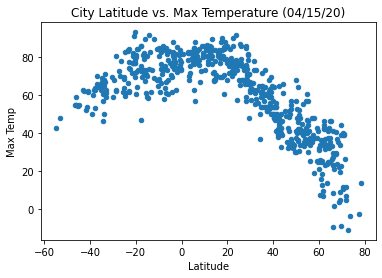

In [80]:
#Latitude vs. Temperature Plot
lt = cleaned_city_df.plot.scatter(x='Lat', 
                             y='Max Temp',
                             title="City Latitude vs. Max Temperature (04/15/20)"
                            )
lt.set_xlabel("Latitude")
lc.set_ylabel("Max Temperature (F)")
display(lc)
# This plot represents the temperatures found in the set of cities at a given latitude.

<AxesSubplot:title={'center':'City Latitude vs. Humidity (04/15/20)'}, xlabel='Latitude', ylabel='Humidity (%)'>

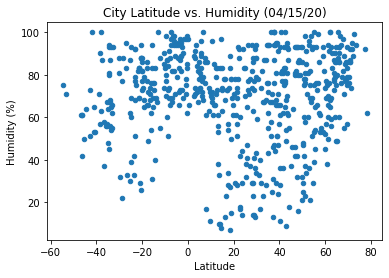

In [81]:
#Latitude vs. Humidity Plot
lh = cleaned_city_df.plot.scatter(x='Lat', 
                             y='Humidity',
                             title="City Latitude vs. Humidity (04/15/20)"
                            )
lh.set_xlabel("Latitude")
lh.set_ylabel("Humidity (%)")
display(lh)
# This plot represents the humidity found in cities at a given latitude.

<AxesSubplot:title={'center':'City Latitude vs. Cloudiness (04/15/20)'}, xlabel='Latitude', ylabel='Cloudiness (%)'>

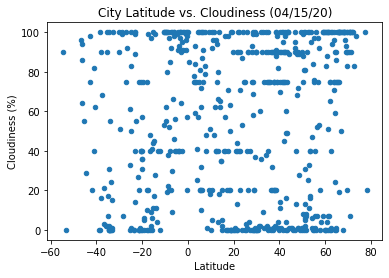

In [82]:
#Latitude vs. Cloudiness Plot
lc = cleaned_city_df.plot.scatter(x='Lat', 
                                  y='Cloudiness',
                                  title="City Latitude vs. Cloudiness (04/15/20)"
                                 )
lc.set_xlabel("Latitude")
lc.set_ylabel("Cloudiness (%)")
display(lc)
# This graph illustrates the cloudy percentage for a given latitude.

<AxesSubplot:title={'center':'City Latitude vs. Wind Speed (04/15/20)'}, xlabel='Latitude', ylabel='Wind Speed (mph)'>

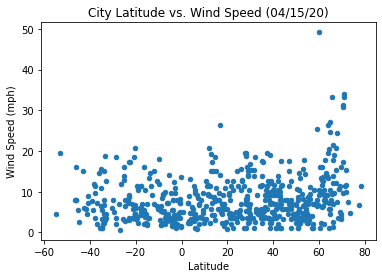

In [83]:
#Latitude vs. Wind Speed Plot
lw = cleaned_city_df.plot(kind='scatter',
                     x='Lat', 
                     y='Wind Speed', 
                     title="City Latitude vs. Wind Speed (04/15/20)",
                    )
lw.set_xlabel("Latitude")
lw.set_ylabel("Wind Speed (mph)")
display(lw)
# This graph illustrates wind speed in cities at a given latitude

In [84]:
# Cut data into northern hemisphere and southern hemisphere
northern_hemisphere_data = cleaned_city_df[cleaned_city_df['Lat'] > 0]

southern_hemisphere_data = cleaned_city_df[cleaned_city_df['Lat'] <= 0]

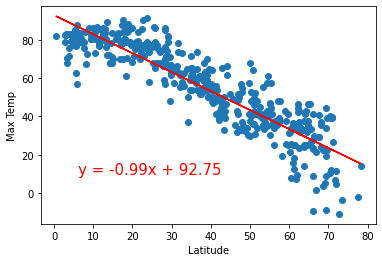

In [85]:
x_arr = northern_hemisphere_data['Lat'].values
y_arr = northern_hemisphere_data['Max Temp'].values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x=x_arr,y=y_arr)
x_values = northern_hemisphere_data['Lat']
y_values = northern_hemisphere_data['Max Temp']
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
# This plot and the accompanying linear regression line shows that 
# as latitude increases, max temperature decreases in the northern 
# hemisphere.

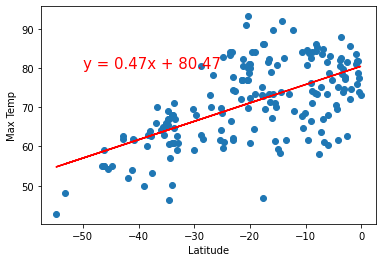

In [86]:
x_arr = southern_hemisphere_data['Lat'].values
y_arr = southern_hemisphere_data['Max Temp'].values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x=x_arr,y=y_arr)
x_values = southern_hemisphere_data['Lat']
y_values = southern_hemisphere_data['Max Temp']

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
# This plot and the accompanying linear regression line shows that 
# as latitude increases, max temperature increases in the southern 
# hemisphere. This combined with the prior graph show that temperature 
# increases as lat approaches 0.

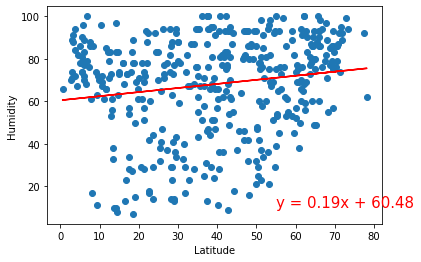

In [87]:
x_arr = northern_hemisphere_data['Lat'].values
y_arr = northern_hemisphere_data['Humidity'].values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x=x_arr,y=y_arr)
x_values = northern_hemisphere_data['Lat']
y_values = northern_hemisphere_data['Humidity']
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
# This plot and the accompanying linear regression line shows that 
# as latitude increases, humidity increases slightly in the northern 
# hemisphere.

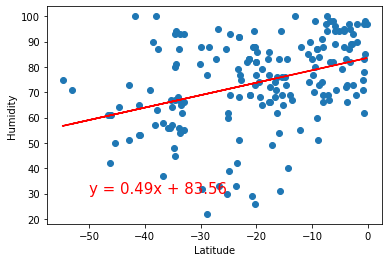

In [88]:
x_arr = southern_hemisphere_data['Lat'].values
y_arr = southern_hemisphere_data['Humidity'].values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x=x_arr,y=y_arr)
x_values = southern_hemisphere_data['Lat']
y_values = southern_hemisphere_data['Humidity']

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
# This plot and the accompanying linear regression line shows that 
# as latitude increases, humidity increases in the southern 
# hemisphere. This combined with the prior graph show that humidity 
# increases as latitude increases and does not seem to be effected by
# proximity to the equator.

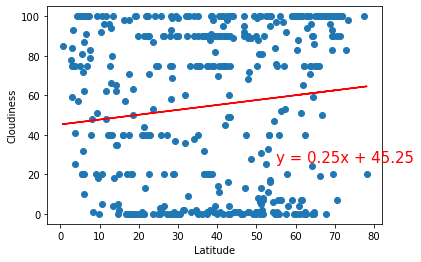

In [89]:
x_arr = northern_hemisphere_data['Lat'].values
y_arr = northern_hemisphere_data['Cloudiness'].values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x=x_arr,y=y_arr)
x_values = northern_hemisphere_data['Lat']
y_values = northern_hemisphere_data['Cloudiness']
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,26),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
# This plot and the accompanying linear regression line shows that 
# as latitude increases, cloud coverage increases slightly in the northern 
# hemisphere.

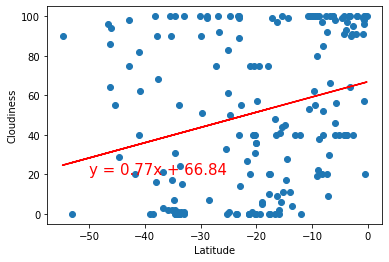

In [90]:
x_arr = southern_hemisphere_data['Lat'].values
y_arr = southern_hemisphere_data['Cloudiness'].values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x=x_arr,y=y_arr)
x_values = southern_hemisphere_data['Lat']
y_values = southern_hemisphere_data['Cloudiness']

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
# This plot and the accompanying linear regression line shows that 
# as latitude increases, cloud coverage increases in the southern 
# hemisphere. This combined with the prior graph show that cloud coverage 
# increases with latitude and does not seem to be effected by equator proximity.

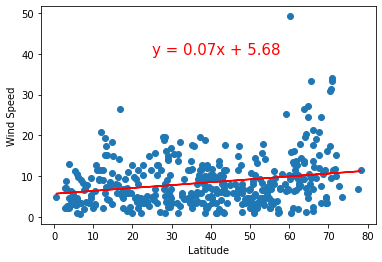

In [91]:
x_arr = northern_hemisphere_data['Lat'].values
y_arr = northern_hemisphere_data['Wind Speed'].values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x=x_arr,y=y_arr)
x_values = northern_hemisphere_data['Lat']
y_values = northern_hemisphere_data['Wind Speed']
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
# This plot and the accompanying linear regression line shows that 
# as latitude increases, wind speed increases slightly in the northern 
# hemisphere.

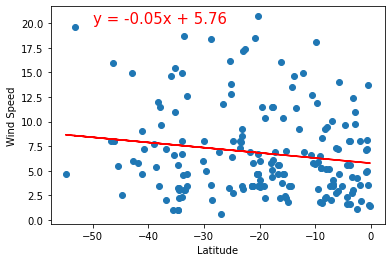

In [92]:
x_arr = southern_hemisphere_data['Lat'].values
y_arr = southern_hemisphere_data['Wind Speed'].values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x=x_arr,y=y_arr)
x_values = southern_hemisphere_data['Lat']
y_values = southern_hemisphere_data['Wind Speed']

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
# This plot and the accompanying linear regression line shows that 
# as latitude increases, wind speed decreases in the southern 
# hemisphere. This combined with the prior graph show that wind speed 
# decreases with proximity to the equator.